In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv(r"C:\Users\user\Downloads\archive (8)\Electronic_sales_Sep2023-Sep2024.csv")

In [11]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [12]:
df.isnull().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [13]:
df.shape

(20000, 16)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [15]:
df.drop(['Customer ID','SKU'],axis=1,inplace=True)

In [16]:
df.head()

,Age,Gender,Loyalty Member,Product Type,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,53,Male,No,Smartphone,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,53,Male,No,Tablet,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,41,Male,No,Laptop,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,41,Male,Yes,Smartphone,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,75,Male,Yes,Smartphone,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [17]:
df.columns

Index(['Age', 'Gender', 'Loyalty Member', 'Product Type', 'Rating',
       'Order Status', 'Payment Method', 'Total Price', 'Unit Price',
       'Quantity', 'Purchase Date', 'Shipping Type', 'Add-ons Purchased',
       'Add-on Total'],
      dtype='object')

In [18]:
df.columns=df.columns.str.replace(' ','_').str.lower()

In [19]:
df.head()

,age,gender,loyalty_member,product_type,rating,order_status,payment_method,total_price,unit_price,quantity,purchase_date,shipping_type,add-ons_purchased,add-on_total
0,53,Male,No,Smartphone,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,53,Male,No,Tablet,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,41,Male,No,Laptop,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,41,Male,Yes,Smartphone,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,75,Male,Yes,Smartphone,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


##  PROBLEM STSTEMENT 1. >> Which payment methods are most common

In [21]:
df['payment_method']=df['payment_method'].str.lower()

In [22]:
df['payment_method'].value_counts()#.plot(kind='bar',color='orange')

payment_method
credit card      5868
paypal           5798
bank transfer    3371
cash             2492
debit card       2471
Name: count, dtype: int64

## CONCLUSION 1. >> Credit card is the most prefered payment method followed by Paypal

## PROBLEM STATEMENT 2 >>  Payment menthods used by gender

In [80]:
df[['payment_method','gender']].value_counts().reset_index().tail(40)#.sort_values(by='payment_method')

,payment_method,gender,count
0,credit card,Male,2997
1,paypal,Male,2945
2,credit card,Female,2871
3,paypal,Female,2853
4,bank transfer,Male,1778
5,bank transfer,Female,1592
6,cash,Female,1287
7,debit card,Male,1239
8,debit card,Female,1232
9,cash,Male,1205


##  CONCLUSION 2. >> Male using credit card as major payment menthod and female prefere debit card or cash

## PROBLEM STATEMENT 3 >> Age-wise preference of payment menthod

In [79]:
df[['payment_method','age']].value_counts().reset_index().tail(40)#.sort_values(by='payment_method')

,payment_method,age,count
275,cash,31,36
276,debit card,77,36
277,cash,22,36
278,debit card,18,36
279,debit card,32,36
280,cash,34,36
281,cash,80,35
282,cash,50,35
283,cash,30,35
284,debit card,58,35


## CONCLUSION 3. Age group 40-50 are more involved in credit card/paypal paymet menthod and age group below 30 or above 55 is more involved in cash payment

## PROBLEM STATEMENT 4.>> TOP 5 PRODUCT IN SALES

In [81]:
df.groupby('product_type')['total_price'].sum()

product_type
Headphones     4041400.24
Laptop        12296239.97
Smartphone    21516754.69
Smartwatch    14036273.06
Tablet        11712000.41
Name: total_price, dtype: float64

<Axes: xlabel='product_type'>

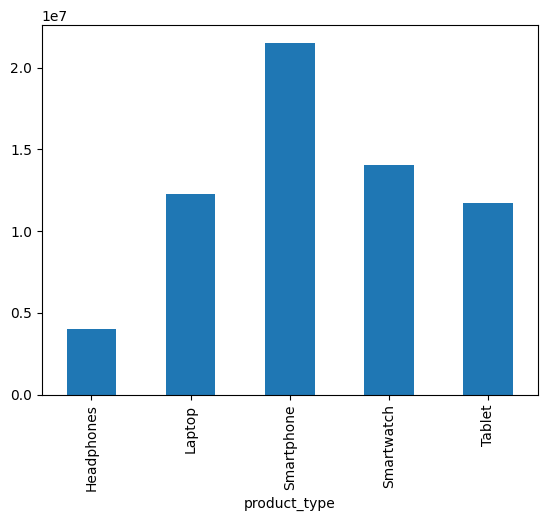

In [28]:
df.groupby('product_type')['total_price'].sum().plot(kind='bar')

## CONCLUSION 4.>> Smartphones are the top sales products followed by smartwatches

## PROBLEM STSTEMENT 5.>> Order cancelled analysis

In [31]:
dfc=df[df['order_status']=='Cancelled']

In [32]:
dfc['loyalty_member'].value_counts()

loyalty_member
No     5145
Yes    1423
Name: count, dtype: int64

## CONCLUSION 5. Cancelations are more by people who are not in loyalty menbers group.

## PROBLEM STSTEMENT 6.>> Rating Analysis

In [34]:
df['rating'].value_counts()

rating
3    7963
2    3972
5    3969
1    2061
4    2035
Name: count, dtype: int64

## CONCLUSION 6.>> Most of the rating are for 3 & 2,company needs to improve the overall service to get 4 & 5 ratings

## PROBLEM STSTEMENT 7.>> Prefered shipping type and cancelled status analysis

In [37]:
df[['shipping_type','order_status']].value_counts()

shipping_type  order_status
Standard       Completed       4561
Overnight      Completed       2247
Express        Completed       2227
Expedited      Completed       2210
Same Day       Completed       2187
Standard       Cancelled       2164
Express        Cancelled       1139
Overnight      Cancelled       1110
Same Day       Cancelled       1093
Expedited      Cancelled       1062
Name: count, dtype: int64

## CONCLUSION 7.>> Standered shipping type is prefered followed by overnight.

In [38]:
df.head()

,age,gender,loyalty_member,product_type,rating,order_status,payment_method,total_price,unit_price,quantity,purchase_date,shipping_type,add-ons_purchased,add-on_total
0,53,Male,No,Smartphone,2,Cancelled,credit card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,53,Male,No,Tablet,3,Completed,paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,41,Male,No,Laptop,3,Completed,credit card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,41,Male,Yes,Smartphone,2,Completed,cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,75,Male,Yes,Smartphone,5,Completed,cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [50]:
df['month']=pd.to_datetime(df['purchase_date']).dt.month

In [53]:
df['year']=pd.to_datetime(df['purchase_date']).dt.year

In [54]:
df['day']=pd.to_datetime(df['purchase_date']).dt.day

In [55]:
df.head()

,age,gender,loyalty_member,product_type,rating,order_status,payment_method,total_price,unit_price,quantity,purchase_date,shipping_type,add-ons_purchased,add-on_total,month,day,year
0,53,Male,No,Smartphone,2,Cancelled,credit card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,3,20,2024
1,53,Male,No,Tablet,3,Completed,paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,4,20,2024
2,41,Male,No,Laptop,3,Completed,credit card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,10,17,2023
3,41,Male,Yes,Smartphone,2,Completed,cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,8,9,2024
4,75,Male,Yes,Smartphone,5,Completed,cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,5,21,2024


## PROBLEM STSTEMENT 8.>> Yearly sales analysis

In [59]:
df.groupby('year')['total_price'].sum()

year
2023     6849562.61
2024    56753105.76
Name: total_price, dtype: float64

## CONCLUSION 8.>> Sales have grown drastically from 2023 to 2024

## PROBLEM STSTEMENT 9.>> Sales spread month-wise in a year

<Axes: xlabel='month'>

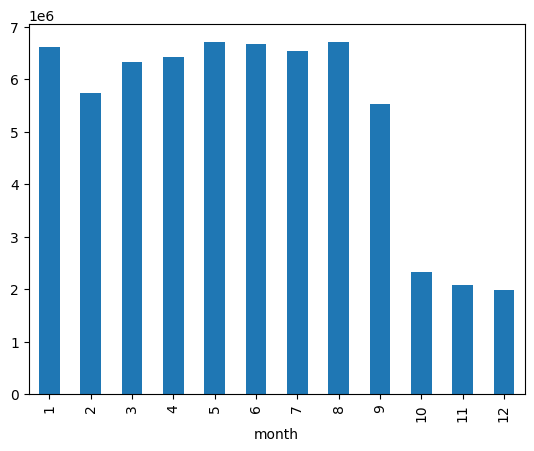

In [69]:
df.groupby('month')['total_price'].sum().plot(kind='bar')

## CONCLUSION 10.>> Sales are very low during oct/nov/dec company needs to focus during this quarter

<Axes: xlabel='day'>

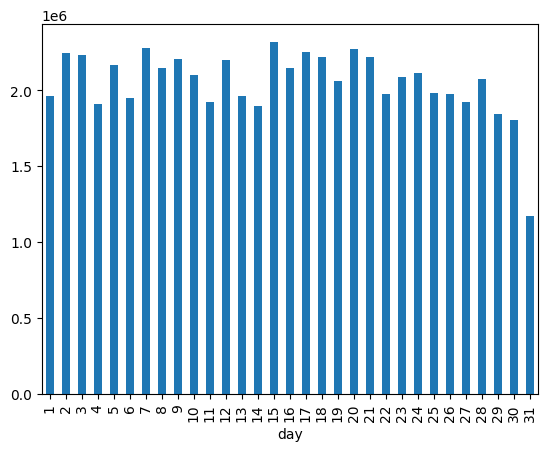

In [68]:
df.groupby('day')['total_price'].sum().plot(kind='bar')